[Placeholders](http://learningtensorflow.com/lesson4/)

A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data.

## Examples

In [1]:
import tensorflow as tf

x = tf.placeholder("float", 3)
y = x * 2

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)

[ 2.  4.  6.]


Let's break this program down:

1. we create a placeholder called x, i.e. a place in memory where we will store value later on. The 3 on this line denotes that we will store three values in this placeholder.
2. we create a Tensor called y, which is the operation of multiplying x by 2
3. We create a session object, and then run just the y variable. Running y requires knowledge about the values of x. We define these inside the feed_dict argument to run.

Placeholders do not need to be statically sized.

In [2]:
import tensorflow as tf

x = tf.placeholder("float", None)
y = x * 2

with tf.Session() as session:
    result = session.run(y, feed_dict={x: [1, 2, 3, 4 ]})
    print(result)

[ 2.  4.  6.  8.]


Placeholders can also have multiple dimensions, allowing for storing arrays.

In [3]:
import tensorflow as tf

x = tf.placeholder("float", [None, 3])
y = x * 2

with tf.Session() as session:
    x_data = [[1, 2, 3],
              [4, 5, 6],]
    result = session.run(y, feed_dict={x: x_data})
    print(result)

[[  2.   4.   6.]
 [  8.  10.  12.]]


We can extend this to take an arbitrary number of None dimensions.<br>
we load up the image from our last lesson, then create a placeholder that stores a slice of that image.<br>
The result is a subsegment of the image.

(300, 467, 3)


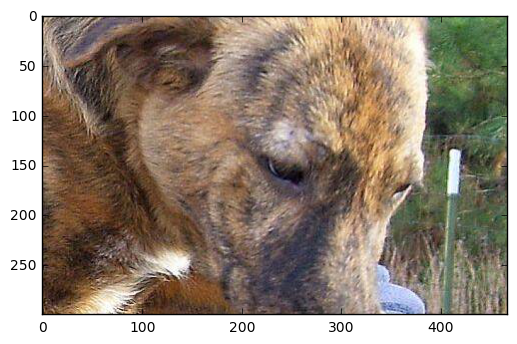

In [5]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "sample.jpg"
raw_image_data = mpimg.imread(filename)

image = tf.placeholder("uint8", [None, None, 3])
slice = tf.slice(image, [100, 0, 0], [300, -1, -1])

with tf.Session() as session:
    result = session.run(slice, feed_dict={image: raw_image_data})
    print(result.shape)

plt.imshow(result)
plt.show()

`tf.slice(input_, begin, size, name=None)`

## Exercises

2) Break the image apart into four “corners”, then stitch it back together again.

In [13]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# First, load the image again
filename = "sample.jpg"
raw_image_data = mpimg.imread(filename)
height,width,_=raw_image_data.shape
image = tf.placeholder("uint8", [None, None, 3])
slice_lt = tf.slice(image, [0, 0, 0], [(int)(height/2), (int)(width/2), -1])
slice_rt = tf.slice(image, [0, (int)(width/2), 0], [(int)(height/2), -1, -1])
slice_lb = tf.slice(image, [(int)(height/2), 0, 0], [-1, (int)(width/2), -1])
slice_rb = tf.slice(image, [(int)(height/2), (int)(width/2), 0], [-1, -1, -1])
with tf.Session() as session:
    
    result_lt = session.run(slice_lt, feed_dict={image: raw_image_data})
    result_rt = session.run(slice_rt, feed_dict={image: raw_image_data})
    result_lb = session.run(slice_lb, feed_dict={image: raw_image_data})
    result_rb = session.run(slice_rb, feed_dict={image: raw_image_data})
    
    origin_t=tf.concat(0,[slice_lt,slice_rt])
    origin_b=tf.concat(0,[slice_lb,slice_rb])
    origin=tf.concat(1,[origin_t,origin_b])
    result_origin=session.run(origin,feed_dict={image: raw_image_data})
    
plt.subplot(221)
plt.imshow(result_lt)
plt.subplot(222)
plt.imshow(result_rt)
plt.subplot(223)
plt.imshow(result_lb)
plt.subplot(224)
plt.imshow(result_rb)


plt.show()

InvalidArgumentError: ConcatOp : Dimensions of inputs should match: shape[0] = [250,233,3] vs. shape[1] = [250,234,3]
	 [[Node: concat_13 = Concat[N=2, T=DT_UINT8, _device="/job:localhost/replica:0/task:0/cpu:0"](concat_13/concat_dim, Slice_25, Slice_26)]]
Caused by op 'concat_13', defined at:
  File "/root/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/root/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/root/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/root/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/root/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/root/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/root/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/root/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/root/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/root/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/root/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-13-9cec72f1292a>", line 22, in <module>
    origin_b=tf.concat(0,[slice_lb,slice_rb])
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 759, in concat
    name=name)
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 414, in _concat
    values=values, name=name)
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2310, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/root/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()


3) Convert the image into grayscale. One way to do this would be to take just a single colour channel and show that. Another way would be to take the average of the three channels as the gray colour.